In [72]:
# playing with car companies (financial analysis)
# we will download historical prices for Tesla, Ford and General Motors
# we will calculate and compare returns, volatility and check wether or not there is any relationship between them
# created by nicolas at 19/05/21

In [73]:
# importing libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
# setting dates
import datetime
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,1,1)


In [75]:
# Downloading the Data:

# TESLA
tesla = pd.DataFrame()
tesla = web.DataReader('TSLA', 'yahoo', start, end)

# FORD
ford = pd.DataFrame()
ford = web.DataReader('F', 'yahoo', start, end)

# General Motors
gm = pd.DataFrame()
gm = web.DataReader('GM', 'yahoo', start, end)

In [76]:
tesla.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990
2020-12-30,696.599976,668.359985,672.00000,694.780029,42846000.0,694.780029
2020-12-31,718.719971,691.119995,699.98999,705.669983,49649900.0,705.669983


In [77]:
ford.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,8.93,8.78,8.93,8.82,37537900.0,8.82
2020-12-30,8.92,8.81,8.83,8.86,38461900.0,8.86
2020-12-31,8.86,8.78,8.84,8.79,40176500.0,8.79


In [78]:
gm.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,42.130001,41.369999,41.889999,41.570000,7987700.0,41.570000
2020-12-30,42.200001,41.570000,41.650002,41.840000,6491900.0,41.840000
2020-12-31,41.799999,41.200001,41.759998,41.639999,11101300.0,41.639999


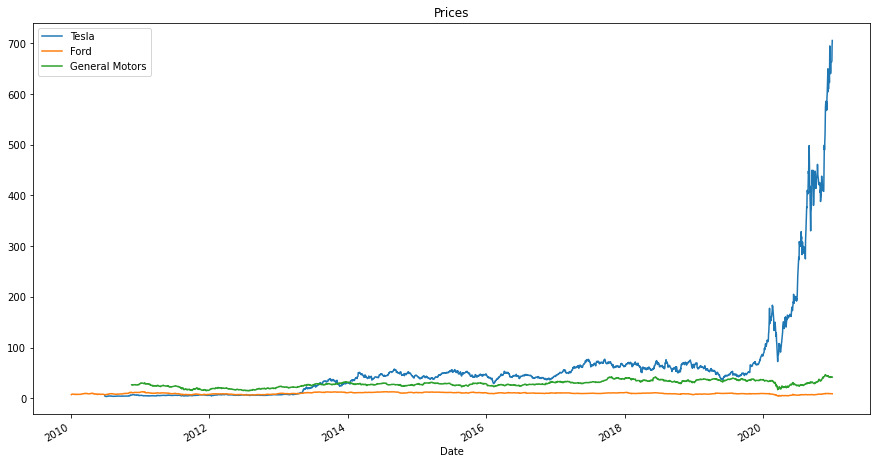

In [79]:
# Visualizing the data:

# We will use the 'Adj Close' price to monitor prices:
tesla['Adj Close'].plot(label = 'Tesla', figsize=(15,8), title = 'Prices')
ford['Adj Close'].plot(label = 'Ford', figsize=(15,8), title = 'Prices')
gm['Adj Close'].plot(label = 'General Motors', figsize=(15,8), title = 'Prices')

plt.legend();

In [80]:
# TESLA went well above and beyond the moon

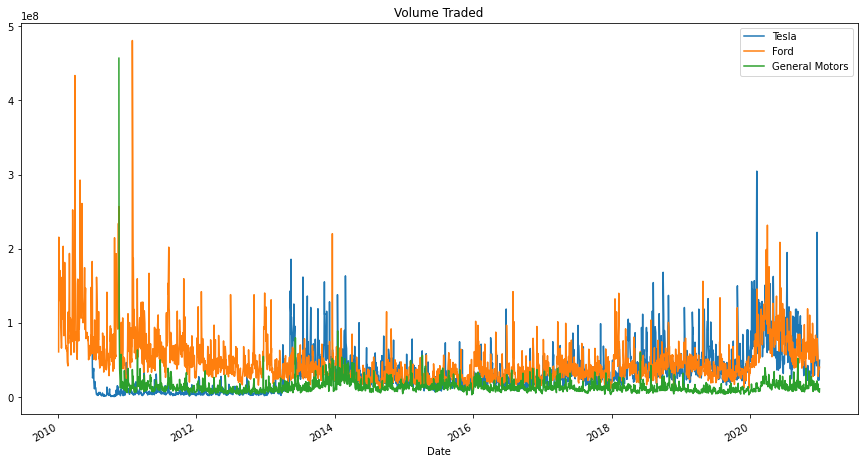

In [81]:
# Ploting Volume of stock traded
tesla['Volume'].plot(label = 'Tesla', figsize=(15,8), title = 'Volume Traded')
ford['Volume'].plot(label = 'Ford', figsize=(15,8), title = 'Volume Traded')
gm['Volume'].plot(label = 'General Motors', figsize=(15,8), title = 'Volume Traded')

plt.legend();

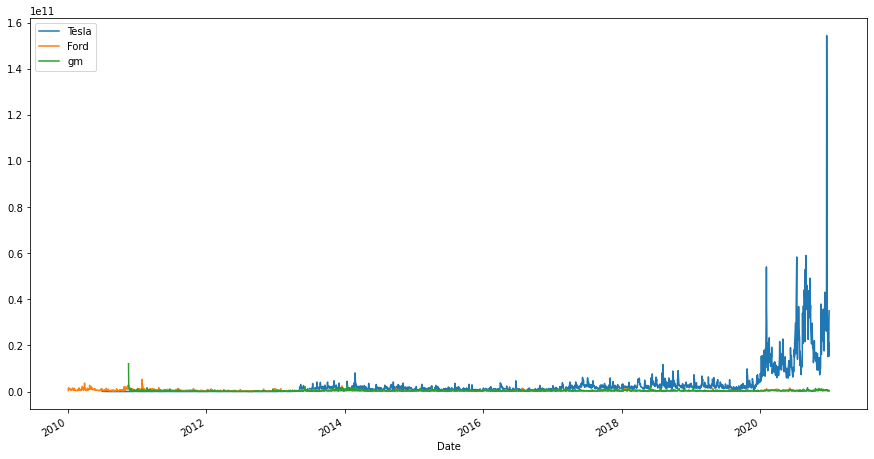

In [82]:
tesla['Total Traded'] = tesla['Adj Close']*tesla['Volume']
ford['Total Traded'] = ford['Adj Close']*ford['Volume']
gm['Total Traded'] = gm['Adj Close']*gm['Volume']

tesla['Total Traded'].plot(label = 'Tesla', figsize=(15, 8))
ford['Total Traded'].plot(label = 'Ford', figsize=(15, 8))
gm['Total Traded'].plot(label = 'gm', figsize=(15, 8))

plt.legend();

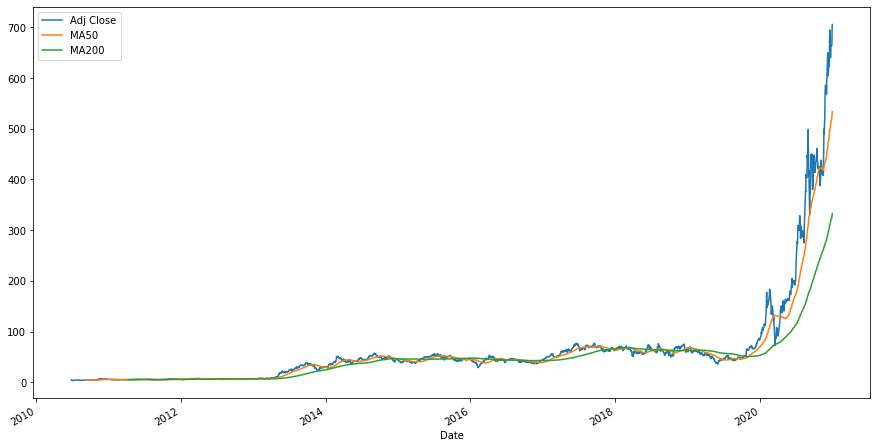

In [83]:
# Plotting the 50 Day Moving Average and the 200 Day Moving Average
# Let's do Tesla

# calculating and adding the MA's as series
tesla['MA50'] = tesla['Adj Close'].rolling(50).mean()
tesla['MA200'] = tesla['Adj Close'].rolling(200).mean()

# plotting the graph
tesla[['Adj Close', 'MA50', 'MA200']].plot(figsize=(15, 8))
plt.legend();

In [84]:
# Will now create a scatter matrix plot and check if there is any relationship between these stocks

from pandas.plotting import scatter_matrix

all_car_comp = pd.concat([tesla['Adj Close'], gm['Adj Close'], ford['Adj Close']], axis = 1)
all_car_comp.columns = ['Tesla Adj Close', 'GM Adj Close', 'Ford Adj Close']
all_car_comp.head()

,Tesla Adj Close,GM Adj Close,Ford Adj Close
Date,,,
2010-01-04,NaN,NaN,6.968545
2010-01-05,NaN,NaN,7.429503
2010-01-06,NaN,NaN,7.707428
2010-01-07,NaN,NaN,7.904015
2010-01-08,NaN,NaN,7.924348


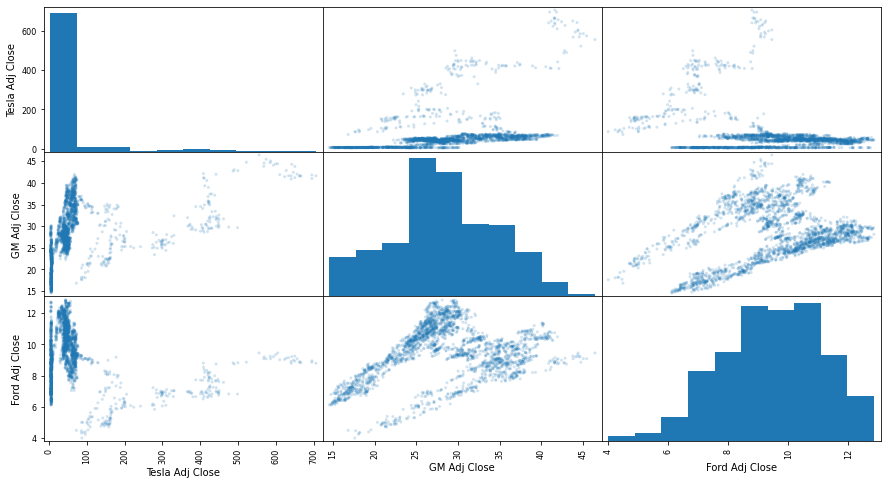

In [85]:
scatter_matrix(all_car_comp, figsize=(15, 8), alpha = 0.2, hist_kwds = {});


In [86]:
# Seems like there is a clear relationship betweern Ford and GM, but the same thing cannot be said for Tesla

In [87]:
# calculating daily returns
tesla['Returns'] = (tesla['Adj Close'] / tesla['Adj Close'].shift(1)) - 1
ford['Returns'] = (ford['Adj Close'] / ford['Adj Close'].shift(1)) - 1
gm['Returns'] = (gm['Adj Close'] / gm['Adj Close'].shift(1)) - 1

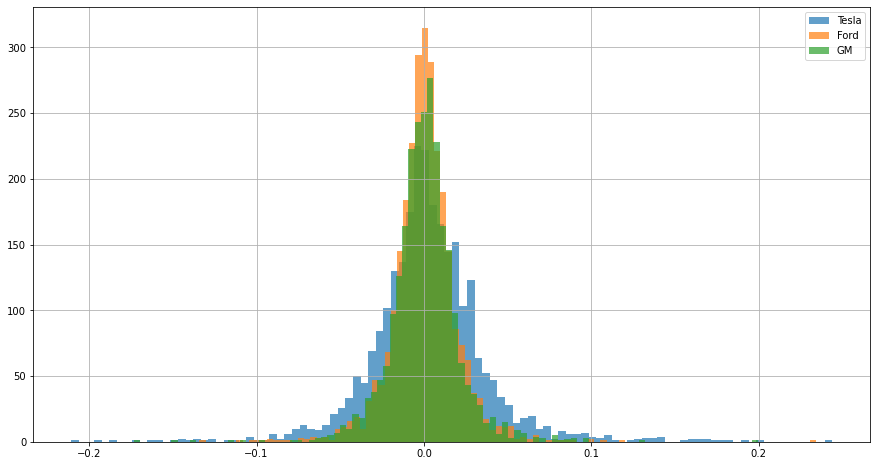

In [88]:
# plotting returns on a histogram
tesla['Returns'].hist(bins = 100, label = 'Tesla', figsize=(15, 8),alpha=0.7);
ford['Returns'].hist(bins=100, label = 'Ford', figsize=(15, 8),alpha=0.7);
gm['Returns'].hist(bins=100, label = 'GM', figsize=(15, 8),alpha=0.7);
plt.legend();

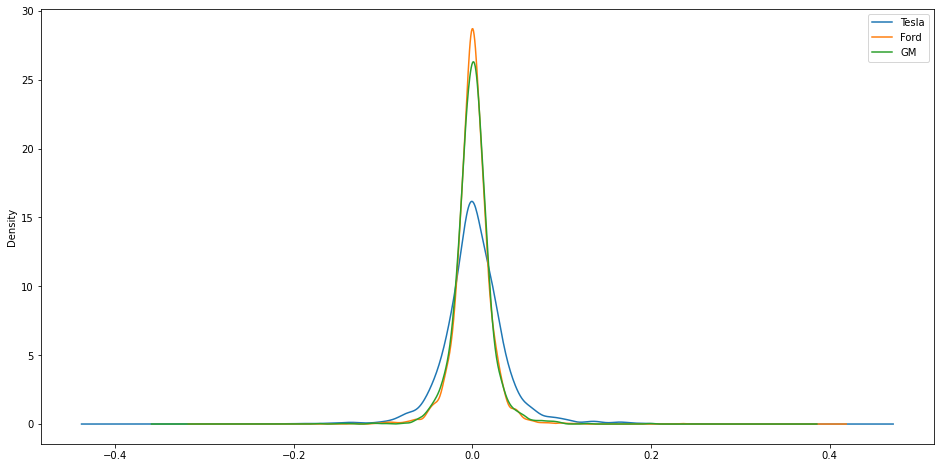

In [89]:
# plotting a KDE
tesla['Returns'].plot(kind = 'kde', label = 'Tesla', figsize=(16,8))
ford['Returns'].plot(kind = 'kde', label = 'Ford', figsize=(16,8))
gm['Returns'].plot(kind = 'kde', label = 'GM', figsize=(16,8))
plt.legend();

In [90]:
# Ford is clearly the least volatile stock out of the 3

<AxesSubplot:>

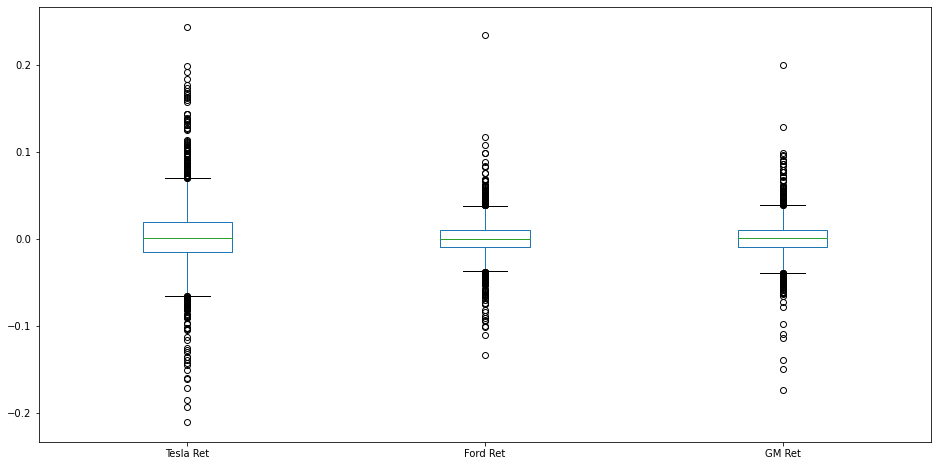

In [91]:
box_df = pd.concat([tesla['Returns'], ford['Returns'], gm['Returns']], axis = 1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind = 'box', figsize=(16, 8))

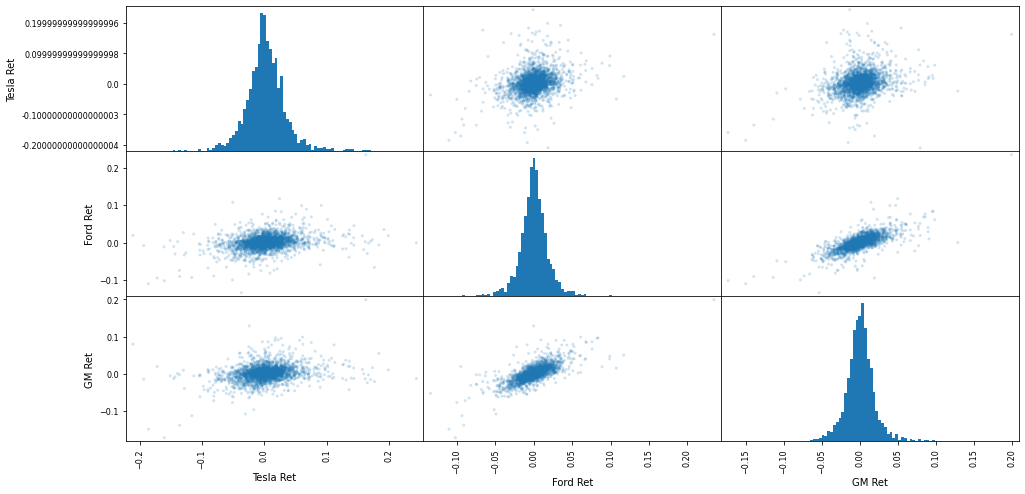

In [92]:
# Let's now compare daily returns between them
scatter_matrix(box_df, figsize=(16, 8), alpha=0.2, hist_kwds = {'bins':100});

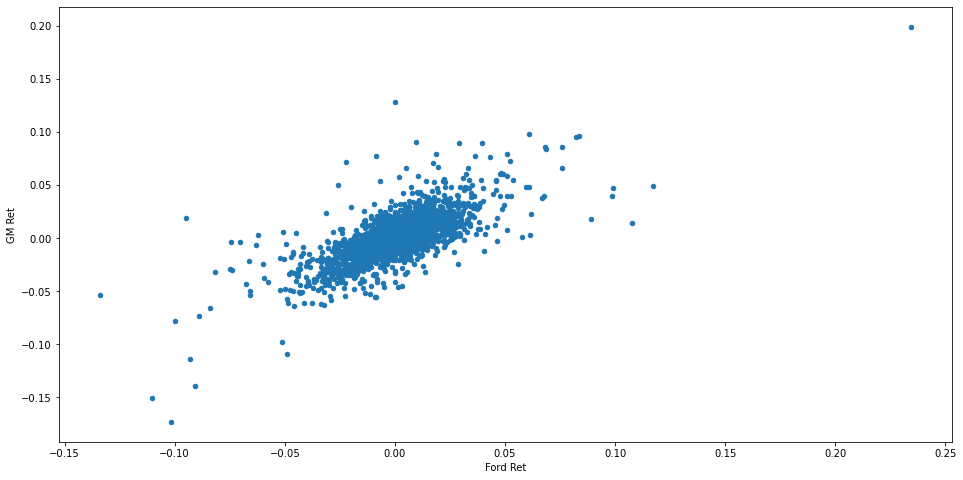

In [93]:
# Since Ford and GM have a clear relationship between them, let's plot them against each other in a scatter plot
box_df.plot(kind = 'scatter', x = 'Ford Ret', y = 'GM Ret', figsize = (16, 8) );

In [94]:
# it is crystal clear that there is indeed a strong relationship between ford and gm

In [95]:
# calculating cumulative returns
tesla['Cumulative Return'] = (1+ tesla['Returns']).cumprod()
ford['Cumulative Return'] = (1+ ford['Returns']).cumprod()
gm['Cumulative Return'] = (1+ gm['Returns']).cumprod()

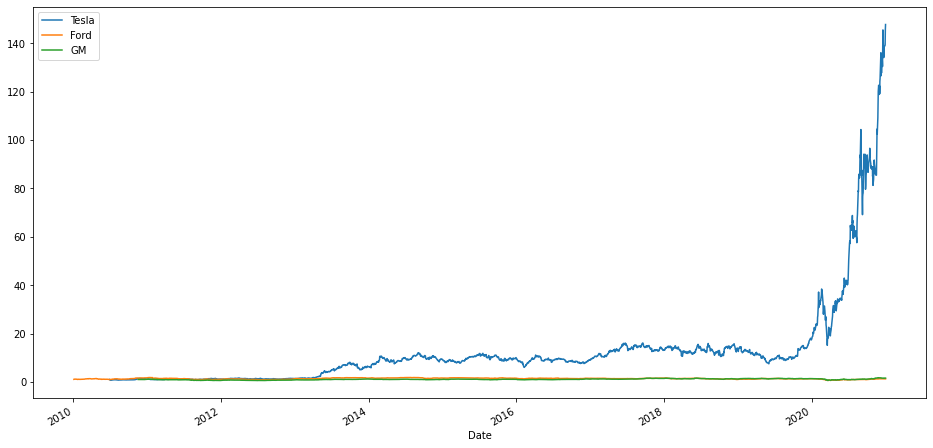

In [96]:
tesla['Cumulative Return'].plot(label = 'Tesla', figsize = (16, 8));
ford['Cumulative Return'].plot(label = 'Ford', figsize = (16, 8));
gm['Cumulative Return'].plot(label = 'GM', figsize = (16, 8));
plt.legend();

In [97]:
# Tesla is a hardcore outlier
# Obviously holding Tesla over the other two for the past 10 years would yield higher profits by far

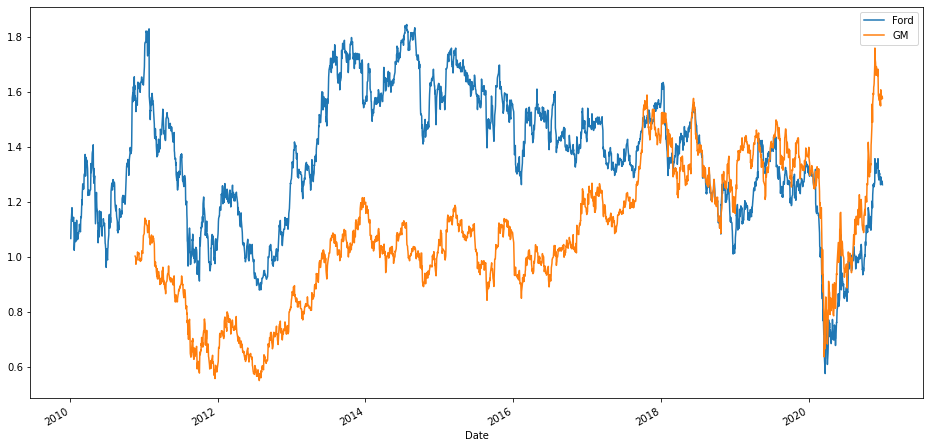

In [98]:
ford['Cumulative Return'].plot(label = 'Ford', figsize = (16, 8));
gm['Cumulative Return'].plot(label = 'GM', figsize = (16, 8));
plt.legend();

In [99]:
# Holding GM stock from 2010 to 2020 was more profitable than holding Ford

In [ ]:
# conclusion
# Tesla has by far outperfomed both Ford and General Motors but is also the most volatile stock
# as seen in the scatter plot and scatter matrix, there is a clear relationship between Ford and GM
# although Ford has outperformed GM up until 2018, investors who hold GM up until 2020 had higher gains